### ....................................  Analysing Job postings on LinkedIn ..................................................

### LinkedIn is a business and employment-focused social media platform that works through websites and mobile apps. It was launched on May 5, 2003 by Reid Hoffman and Eric Ly. Since December 2016, LinkedIn has been a wholly owned subsidiary of Microsoft. The platform is primarily used for professional networking and career development, and allows jobseekers to post their CVs and employers to post jobs.

### 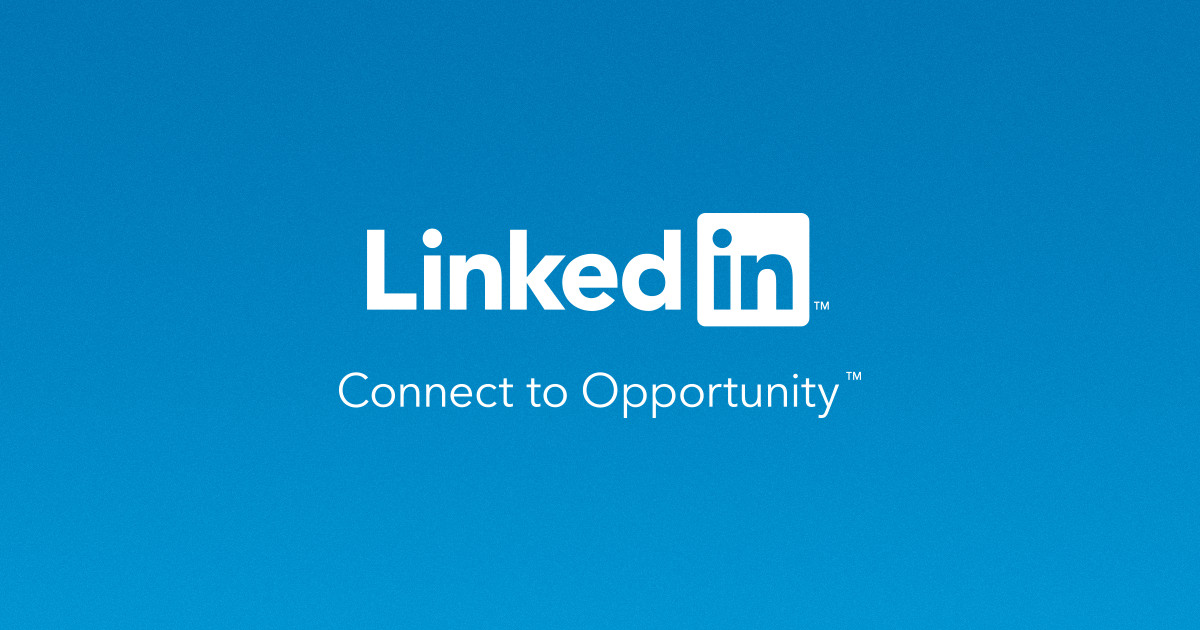

### LinkedIn is a powerful platform for job seekers and recruiters alike. The aim behind doing this LinkedIn Job Posting Analysis is to analysis which skills are on high demand currently in market. What are the maximum salaries offered by the recruiters, their payabale durations and the benefits offered by industries on thoes jobs.

# IMPORTING PYTHON LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib 
from matplotlib import pyplot as plt
import seaborn as sns

# IMPORTING OF DATA FILES

In [2]:
skills = pd.read_csv("C:/Users/bhavj/Desktop/python_C1/job_skills.csv")
skills

,job_id,skill_abr
0,3884428798,MRKT
1,3884428798,PR
2,3884428798,WRT
3,3887473071,SALE
4,3887465684,FIN
...,...,...
213763,3902876855,HR
213764,3902878689,MGMT
213765,3902878689,MNFC
213766,3902883233,SALE


In [3]:
job_ind = pd.read_csv("C:/Users/bhavj/Desktop/python_C1/job_industries.csv")
job_ind

,job_id,industry_id
0,3884428798,82
1,3887473071,48
2,3887465684,41
3,3887467939,82
4,3887467939,80
...,...,...
164803,3902882321,104
164804,3902879720,27
164805,3902876855,80
164806,3902878689,116


In [4]:
sal = pd.read_csv("C:/Users/bhavj/Desktop/python_C1/salaries.csv")
sal

,salary_id,job_id,max_salary,med_salary,min_salary,pay_period,currency,compensation_type
0,1,3884428798,NaN,20.0,NaN,HOURLY,USD,BASE_SALARY
1,2,3887470552,25.00,NaN,23.0,HOURLY,USD,BASE_SALARY
2,3,3884431523,120000.00,NaN,100000.0,YEARLY,USD,BASE_SALARY
3,4,3884911725,200000.00,NaN,10000.0,YEARLY,USD,BASE_SALARY
4,5,3887473220,35.00,NaN,33.0,HOURLY,USD,BASE_SALARY
...,...,...,...,...,...,...,...,...
40780,40781,3902881498,NaN,15.5,NaN,HOURLY,USD,BASE_SALARY
40781,40782,3902883232,NaN,25.0,NaN,HOURLY,USD,BASE_SALARY
40782,40783,3902866633,21.53,NaN,21.1,HOURLY,USD,BASE_SALARY
40783,40784,3902879720,125000.00,NaN,100000.0,YEARLY,USD,BASE_SALARY


In [5]:
benefits = pd.read_csv("C:/Users/bhavj/Desktop/python_C1/benefits.csv")
benefits

,job_id,inferred,type
0,3887473071,0,Medical insurance
1,3887473071,0,Vision insurance
2,3887473071,0,Dental insurance
3,3887473071,0,401(k)
4,3887473071,0,Student loan assistance
...,...,...,...
67938,3902878689,0,Dental insurance
67939,3902878689,0,Pension plan
67940,3902878689,0,Tuition assistance
67941,3902878689,0,Disability insurance


# DATA MERGING 

In [6]:
skill_ind = pd.merge(skills, job_ind, how = 'right', on= 'job_id')
skill_ind

,job_id,skill_abr,industry_id
0,3884428798,MRKT,82
1,3884428798,PR,82
2,3884428798,WRT,82
3,3887473071,SALE,48
4,3887465684,FIN,41
...,...,...,...
288434,3902876855,HR,80
288435,3902878689,MGMT,116
288436,3902878689,MNFC,116
288437,3902883233,SALE,44


In [7]:
skill_ind_sal = pd.merge(skill_ind, sal, how = 'right', on= 'job_id')
skill_ind_sal

,job_id,skill_abr,industry_id,salary_id,max_salary,med_salary,min_salary,pay_period,currency,compensation_type
0,3884428798,MRKT,82.0,1,NaN,20.0,NaN,HOURLY,USD,BASE_SALARY
1,3884428798,PR,82.0,1,NaN,20.0,NaN,HOURLY,USD,BASE_SALARY
2,3884428798,WRT,82.0,1,NaN,20.0,NaN,HOURLY,USD,BASE_SALARY
3,3887470552,ADM,54.0,2,25.00,NaN,23.0,HOURLY,USD,BASE_SALARY
4,3884431523,MGMT,56.0,3,120000.00,NaN,100000.0,YEARLY,USD,BASE_SALARY
...,...,...,...,...,...,...,...,...,...,...
95923,3902883232,ADM,104.0,40782,NaN,25.0,NaN,HOURLY,USD,BASE_SALARY
95924,3902866633,PROD,62.0,40783,21.53,NaN,21.1,HOURLY,USD,BASE_SALARY
95925,3902879720,ACCT,27.0,40784,125000.00,NaN,100000.0,YEARLY,USD,BASE_SALARY
95926,3902878689,MGMT,116.0,40785,85862.00,NaN,63601.0,YEARLY,USD,BASE_SALARY


In [8]:
job_df = pd.merge(skill_ind_sal,benefits,how = 'right', on= 'job_id')
job_df

,job_id,skill_abr,industry_id,salary_id,max_salary,med_salary,min_salary,pay_period,currency,compensation_type,inferred,type
0,3887473071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Medical insurance
1,3887473071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Vision insurance
2,3887473071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Dental insurance
3,3887473071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,401(k)
4,3887473071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Student loan assistance
...,...,...,...,...,...,...,...,...,...,...,...,...
116993,3902878689,MGMT,116.0,40785.0,85862.0,NaN,63601.0,YEARLY,USD,BASE_SALARY,0,Tuition assistance
116994,3902878689,MNFC,116.0,40785.0,85862.0,NaN,63601.0,YEARLY,USD,BASE_SALARY,0,Tuition assistance
116995,3902878689,MGMT,116.0,40785.0,85862.0,NaN,63601.0,YEARLY,USD,BASE_SALARY,0,Disability insurance
116996,3902878689,MNFC,116.0,40785.0,85862.0,NaN,63601.0,YEARLY,USD,BASE_SALARY,0,Disability insurance


# DATA PRE PROCESSING & DATA CLEANING

In [9]:
job_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116998 entries, 0 to 116997
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   job_id             116998 non-null  int64  
 1   skill_abr          77028 non-null   object 
 2   industry_id        77349 non-null   float64
 3   salary_id          77517 non-null   float64
 4   max_salary         68395 non-null   float64
 5   med_salary         9122 non-null    float64
 6   min_salary         68395 non-null   float64
 7   pay_period         77517 non-null   object 
 8   currency           77517 non-null   object 
 9   compensation_type  77517 non-null   object 
 10  inferred           116998 non-null  int64  
 11  type               116998 non-null  object 
dtypes: float64(5), int64(2), object(5)
memory usage: 10.7+ MB


In [10]:
job_df.shape

(116998, 12)

In [11]:
job_df.describe()

,job_id,industry_id,salary_id,max_salary,med_salary,min_salary,inferred
count,1.169980e+05,77349.000000,77517.000000,68395.000000,9122.000000,68395.000000,116998.000000
mean,3.896524e+09,231.818407,20641.665841,101755.411879,33926.302758,72612.783540,0.499957
std,8.831689e+07,622.008096,11167.742680,84390.270445,53237.746452,54999.541566,0.500002
min,2.322152e+07,1.000000,3.000000,7.250000,11.000000,1.000000,0.000000
25%,3.898159e+09,25.000000,12348.000000,54000.000000,20.000000,40000.000000,0.000000
50%,3.901983e+09,48.000000,20699.000000,95000.000000,30.475000,70000.000000,0.000000
75%,3.904582e+09,101.000000,30702.000000,150000.000000,62500.000000,101000.000000,1.000000
max,3.906267e+09,3253.000000,40785.000000,1000000.000000,525000.000000,575000.000000,1.000000


In [12]:
job_df.isnull().sum()

job_id                    0
skill_abr             39970
industry_id           39649
salary_id             39481
max_salary            48603
med_salary           107876
min_salary            48603
pay_period            39481
currency              39481
compensation_type     39481
inferred                  0
type                      0
dtype: int64

In [13]:
job_df.drop(['med_salary'], axis=1, inplace=True)

In [14]:
job_df.dropna(subset=['salary_id'], inplace=True)

In [15]:
job_df.dropna(subset=['industry_id', 'skill_abr'], inplace=True)

In [16]:
job_df.isnull().sum()

job_id                  0
skill_abr               0
industry_id             0
salary_id               0
max_salary           9059
min_salary           9059
pay_period              0
currency                0
compensation_type       0
inferred                0
type                    0
dtype: int64

In [17]:
print("Mean of Maximum Salary = ",job_df['max_salary'].mean())
print("Median of Maximum Salary = ",job_df['max_salary'].median())

Mean of Maximum Salary =  101933.03051597052
Median of Maximum Salary =  95000.0


In [18]:
print("Mean of Minimum Salary = ",job_df['min_salary'].mean())
print("Median of Minimum Salary = ",job_df['min_salary'].median())

Mean of Minimum Salary =  72734.99973958715
Median of Minimum Salary =  70000.0


In [19]:
job_df['max_salary']=job_df['max_salary'].fillna(101933.0)
job_df['min_salary']=job_df['min_salary'].fillna(72734.0)

In [20]:
job_df.isnull().sum()

job_id               0
skill_abr            0
industry_id          0
salary_id            0
max_salary           0
min_salary           0
pay_period           0
currency             0
compensation_type    0
inferred             0
type                 0
dtype: int64

In [21]:
job_df.shape

(77028, 11)

# CHECK & DROP DUPLICATES

In [22]:
job_df.drop_duplicates()

,job_id,skill_abr,industry_id,salary_id,max_salary,min_salary,pay_period,currency,compensation_type,inferred,type
11,3884431523,MGMT,56.0,3.0,120000.0,100000.0,YEARLY,USD,BASE_SALARY,0,Medical insurance
12,3884431523,TRNG,56.0,3.0,120000.0,100000.0,YEARLY,USD,BASE_SALARY,0,Medical insurance
13,3884431523,MGMT,56.0,3.0,120000.0,100000.0,YEARLY,USD,BASE_SALARY,0,Vision insurance
14,3884431523,TRNG,56.0,3.0,120000.0,100000.0,YEARLY,USD,BASE_SALARY,0,Vision insurance
15,3884431523,MGMT,56.0,3.0,120000.0,100000.0,YEARLY,USD,BASE_SALARY,0,Dental insurance
...,...,...,...,...,...,...,...,...,...,...,...
116992,3902878689,MNFC,116.0,40785.0,85862.0,63601.0,YEARLY,USD,BASE_SALARY,0,Pension plan
116993,3902878689,MGMT,116.0,40785.0,85862.0,63601.0,YEARLY,USD,BASE_SALARY,0,Tuition assistance
116994,3902878689,MNFC,116.0,40785.0,85862.0,63601.0,YEARLY,USD,BASE_SALARY,0,Tuition assistance
116995,3902878689,MGMT,116.0,40785.0,85862.0,63601.0,YEARLY,USD,BASE_SALARY,0,Disability insurance


### No duplicates are present in the data

# OUTLIER DETECTION

### BY INTERQUARTILE RANGE METHOD

In [23]:
Q1 = job_df['max_salary'].quantile(0.25)
Q3 = job_df['max_salary'].quantile(0.75)

IQR =Q3-Q1

LF = Q1-(1.5*IQR)
UF = Q3+(1.5*IQR)

(Q1, Q3, IQR, LF, UF)

(60000.0, 140000.0, 80000.0, -60000.0, 260000.0)

In [24]:
outlier_max_sal = job_df.loc[(job_df['max_salary']<0) | (job_df['max_salary']>UF)]
outlier_max_sal.shape

(2287, 11)

<Axes: title={'center': 'Outlier in Maximum Salary'}>

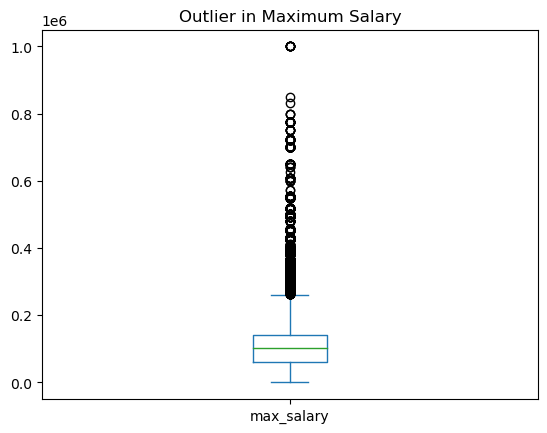

In [25]:
job_df['max_salary'].plot(kind='box', title='Outlier in Maximum Salary')

In [26]:
new_job_df = job_df.loc[(job_df['max_salary']>LF) & (job_df['max_salary']<UF)]
new_job_df.shape

(74697, 11)

<Axes: title={'center': 'No Outlier in Maximum Salary'}>

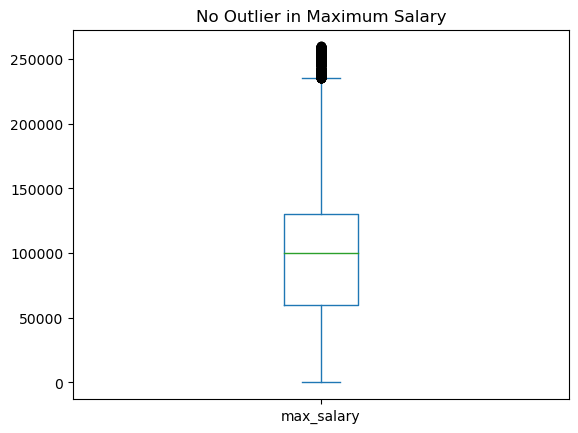

In [27]:
new_job_df['max_salary'].plot(kind='box', title='No Outlier in Maximum Salary')

In [28]:
Q1 = new_job_df['min_salary'].quantile(0.25)
Q3 = new_job_df['min_salary'].quantile(0.75)

IQR =Q3-Q1

LF = Q1-(1.5*IQR)
UF = Q3+(1.5*IQR)

(Q1, Q3, IQR, LF, UF)

(47500.0, 95000.0, 47500.0, -23750.0, 166250.0)

In [29]:
outlier_min_sal = new_job_df.loc[(job_df['min_salary']<0) | (new_job_df['min_salary']>UF)]
outlier_min_sal.shape

(1409, 11)

<Axes: title={'center': 'Outlier in Minimum Salary'}>

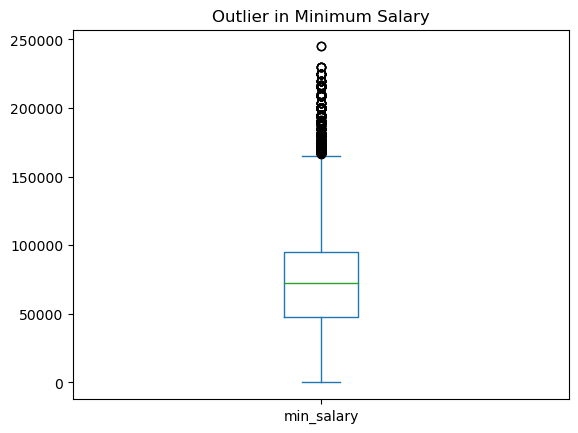

In [30]:
new_job_df['min_salary'].plot(kind='box', title='Outlier in Minimum Salary')

In [31]:
clean_job_df = new_job_df.loc[(job_df['min_salary']>LF) & (new_job_df['min_salary']<UF)]
clean_job_df.shape

(73288, 11)

<Axes: title={'center': 'No Outlier in Minimum Salary'}>

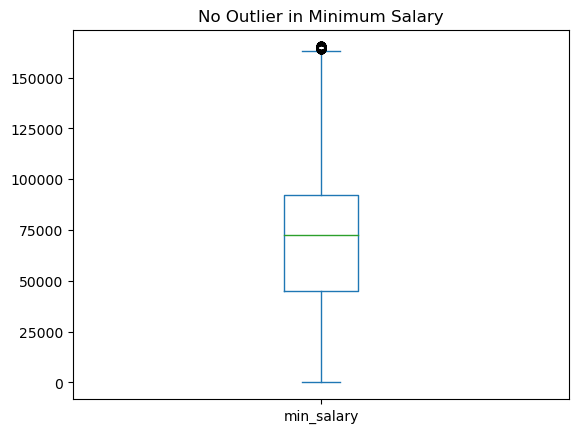

In [32]:
clean_job_df['min_salary'].plot(kind='box', title='No Outlier in Minimum Salary')

# CLEANED DATA READY FOR ANALYSIS

In [33]:
clean_job_df.shape

(73288, 11)

In [34]:
# clean_job_df.to_csv("LinkedIn_Job.csv", index = False)

# DATA VISUALIZATION

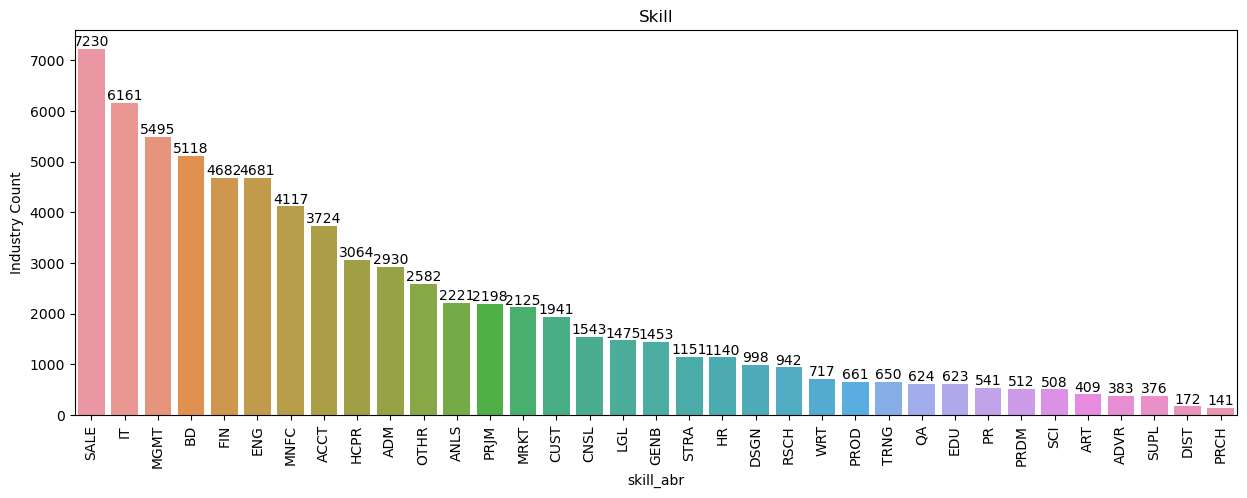

In [44]:
skill=clean_job_df.groupby(by = 'skill_abr')['industry_id'].count().sort_values(ascending = False)

plt.figure(figsize = (15,5))
ax= sns.barplot(x=skill.index, y=skill.values)
plt.xticks(rotation = 90)
ax.bar_label(ax.containers[0], fontsize=10)
plt.title("Skill")
plt.ylabel('Industry Count')
plt.show()

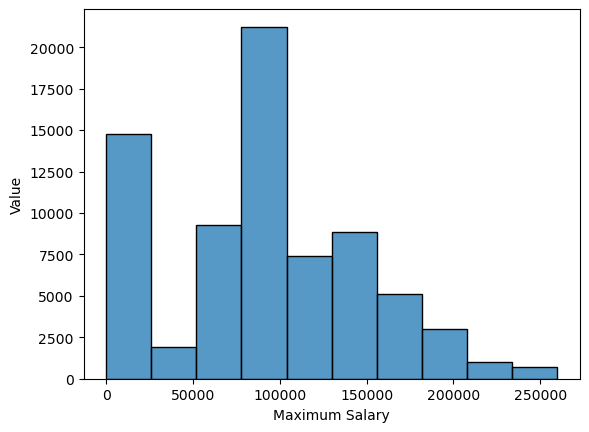

In [50]:
sns.histplot(clean_job_df.max_salary, bins =10)
plt.xlabel("Maximum Salary")
plt.ylabel("Value")
plt.show()

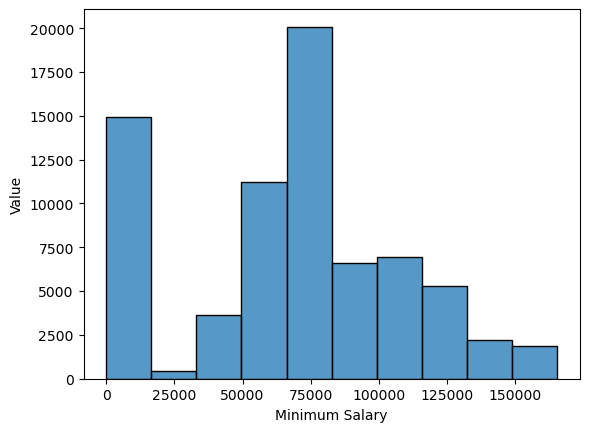

In [51]:
sns.histplot(clean_job_df.min_salary, bins =10)
plt.xlabel("Minimum Salary")
plt.ylabel("Value")
plt.show()

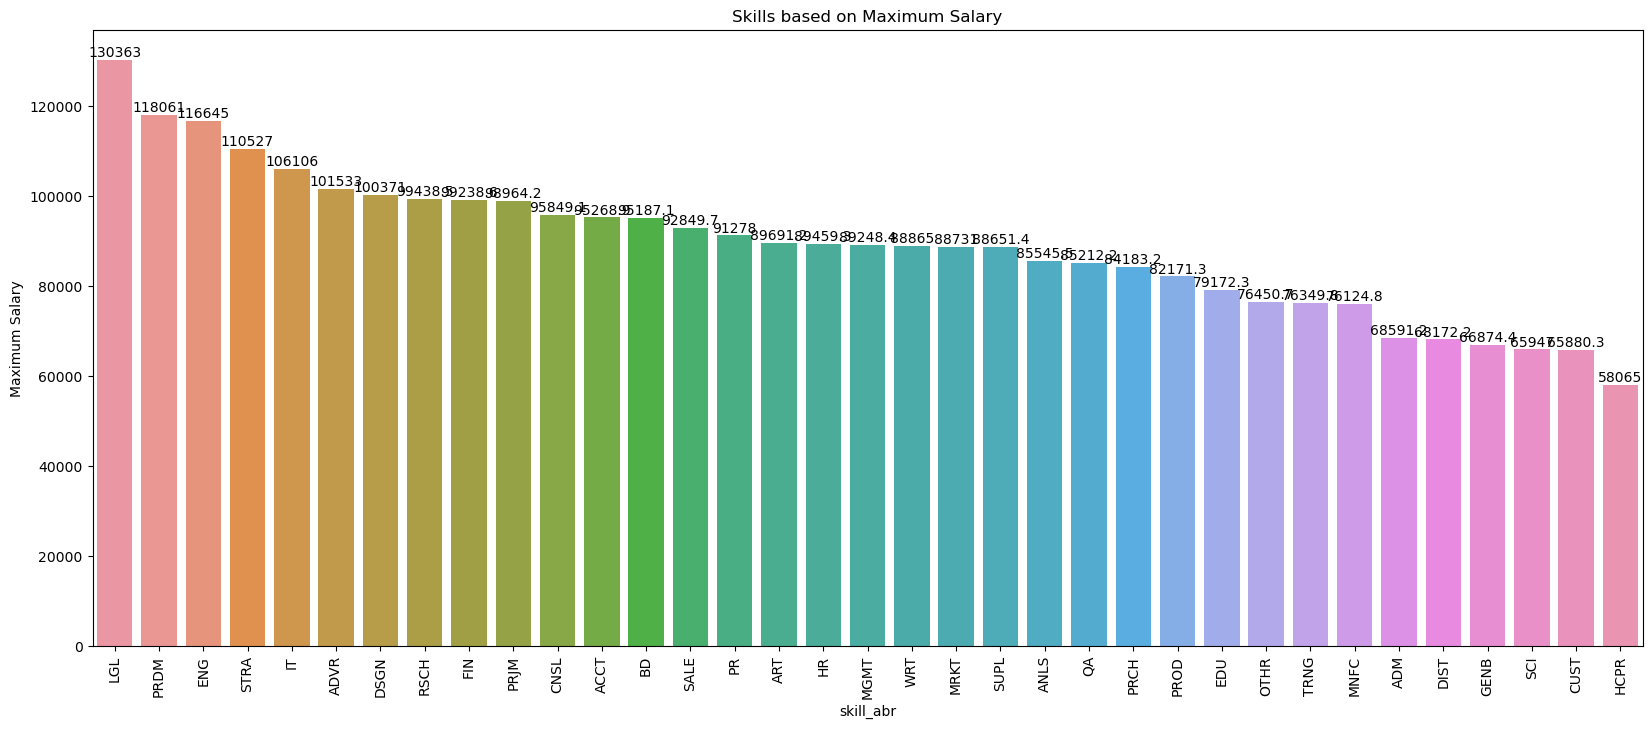

In [64]:
max_sal_skill=clean_job_df.groupby(by = 'skill_abr')['max_salary'].mean().sort_values(ascending = False)

plt.figure(figsize = (20,8))
ax= sns.barplot(x=max_sal_skill.index, y=max_sal_skill.values)
plt.xticks(rotation = 90)
ax.bar_label(ax.containers[0], fontsize=10)
plt.title("Skills based on Maximum Salary")
plt.ylabel('Maximum Salary')
plt.show()

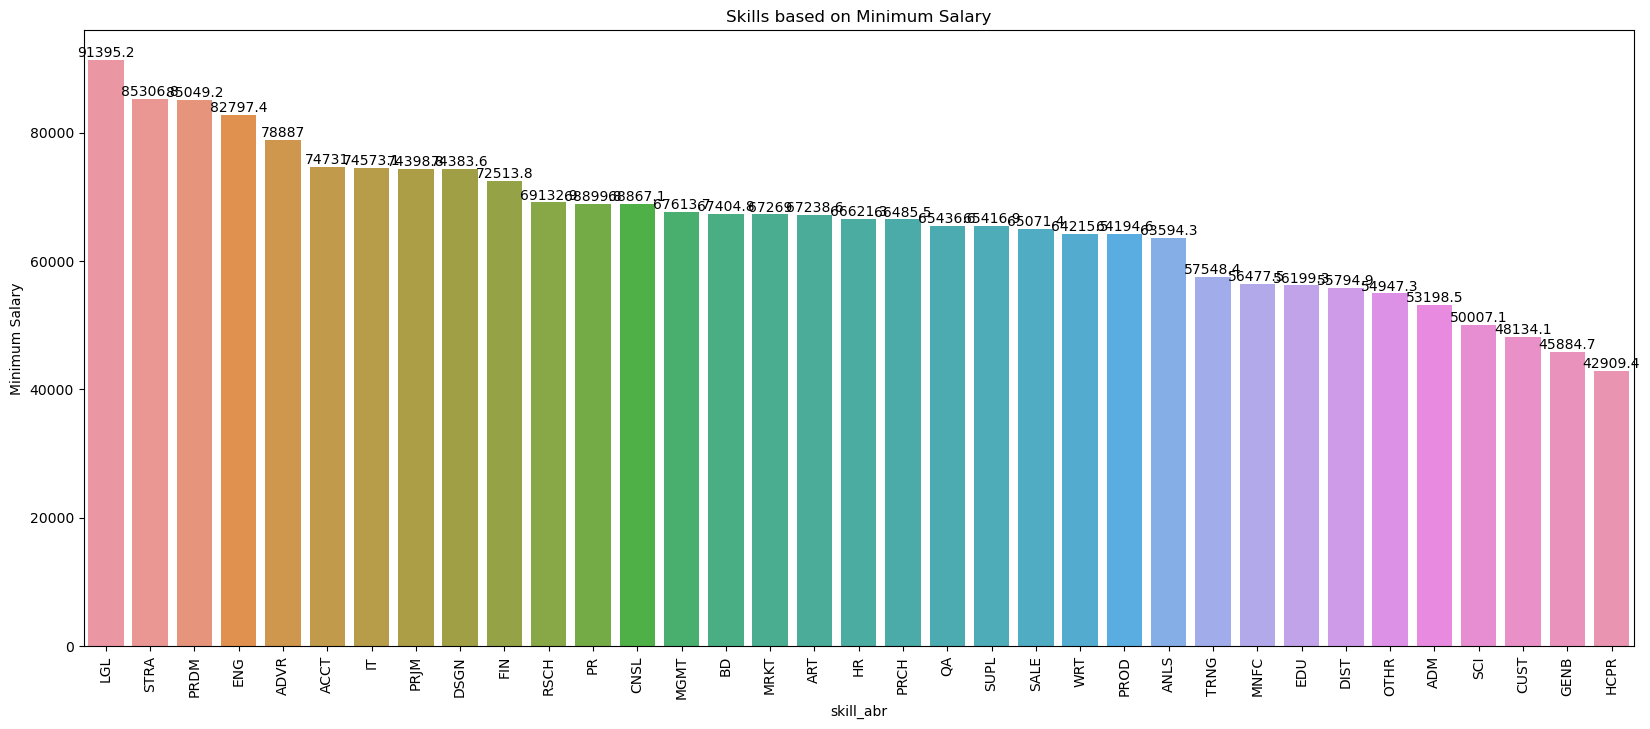

In [63]:
min_sal_skill=clean_job_df.groupby(by = 'skill_abr')['min_salary'].mean().sort_values(ascending = False)

plt.figure(figsize = (20,8))
ax= sns.barplot(x=min_sal_skill.index, y=min_sal_skill.values)
plt.xticks(rotation = 90)
ax.bar_label(ax.containers[0], fontsize=10)
plt.title("Skills based on Minimum Salary")
plt.ylabel('Minimum Salary')
plt.show()

In [45]:
clean_job_df.head()

,job_id,skill_abr,industry_id,salary_id,max_salary,min_salary,pay_period,currency,compensation_type,inferred,type
11,3884431523,MGMT,56.0,3.0,120000.0,100000.0,YEARLY,USD,BASE_SALARY,0,Medical insurance
12,3884431523,TRNG,56.0,3.0,120000.0,100000.0,YEARLY,USD,BASE_SALARY,0,Medical insurance
13,3884431523,MGMT,56.0,3.0,120000.0,100000.0,YEARLY,USD,BASE_SALARY,0,Vision insurance
14,3884431523,TRNG,56.0,3.0,120000.0,100000.0,YEARLY,USD,BASE_SALARY,0,Vision insurance
15,3884431523,MGMT,56.0,3.0,120000.0,100000.0,YEARLY,USD,BASE_SALARY,0,Dental insurance


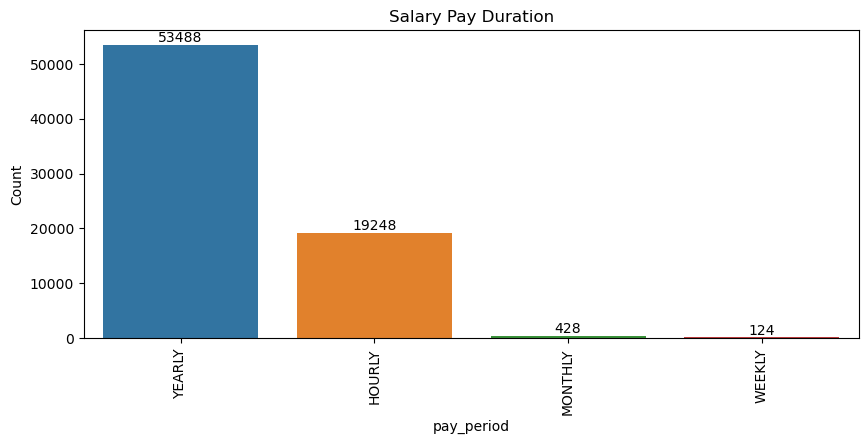

In [68]:
pay_dur=clean_job_df.groupby(by = 'pay_period')['pay_period'].count().sort_values(ascending = False)

plt.figure(figsize = (10,4))
ax= sns.barplot(x=pay_dur.index, y=pay_dur.values)
plt.xticks(rotation = 90)
ax.bar_label(ax.containers[0], fontsize=10)
plt.title("Salary Pay Duration")
plt.ylabel('Count')
plt.show()

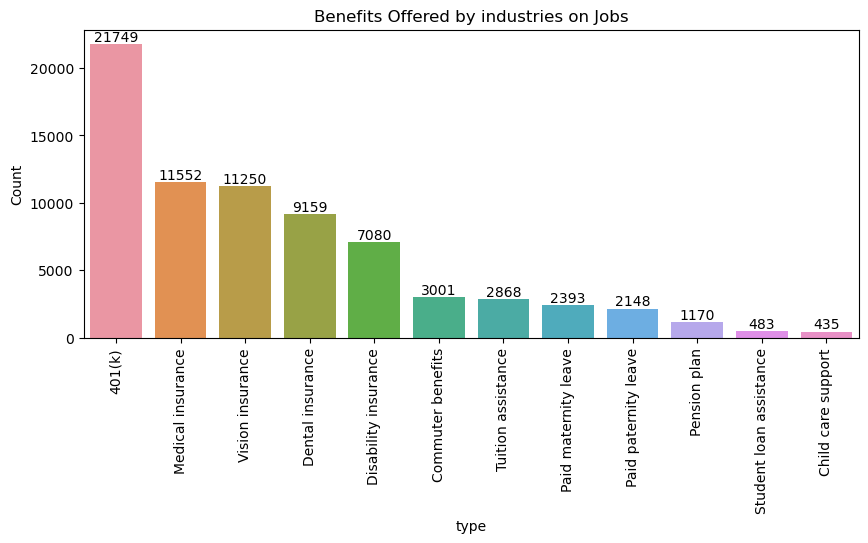

In [69]:
Benefits=clean_job_df.groupby(by = 'type')['type'].count().sort_values(ascending = False)

plt.figure(figsize = (10,4))
ax= sns.barplot(x=Benefits.index, y=Benefits.values)
plt.xticks(rotation = 90)
ax.bar_label(ax.containers[0], fontsize=10)
plt.title("Benefits Offered by industries on Jobs")
plt.ylabel('Count')
plt.show()

### Jobs like Sales, IT, Management, BD , Finanace have highest listings on LinkedIn.
### Overall Maximum Salary Offered is around 50K to 1lac
### Overall Minimum Salary Offered is araound 50K to 75K
### Maximum Salary offered is in LGL, PRDM, ENG, STRA & IT.
### Many companies offered Full time job and payable duration is yearly.
### Benefits offered on this jobs are 401(k), medical insurance.
### If I analyse jobs on the basis of demand, I can say Sales, Engineers & IT skills provide large number of full time jobs through likedin with good package & all benefits. .